set([u'Browns', u'#NFLSunday', u'#WorldSuicidePreventionDay', u'#FlyEaglesFly', u'#HurrcaneIrma'])
[
 {
  "created_at": "2017-09-10T17:53:08Z", 
  "trends": [
   {
    "url": "http://twitter.com/search?q=%23PalcoPopStar", 
    "query": "%23PalcoPopStar", 
    "tweet_volume": 48798, 
    "name": "#PalcoPopStar", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23%D8%A7%D8%B9%D8%AA%D9%82%D8%A7%D9%84_%D8%A7%D9%84%D8%B4%D9%8A%D8%AE_%D8%B3%D9%84%D9%85%D8%A7%D9%86_%D8%A7%D9%84%D8%B9%D9%88%D8%AF%D9%87", 
    "query": "%23%D8%A7%D8%B9%D8%AA%D9%82%D8%A7%D9%84_%D8%A7%D9%84%D8%B4%D9%8A%D8%AE_%D8%B3%D9%84%D9%85%D8%A7%D9%86_%D8%A7%D9%84%D8%B9%D9%88%D8%AF%D9%87", 
    "tweet_volume": 45695, 
    "name": "#\u0627\u0639\u062a\u0642\u0627\u0644_\u0627\u0644\u0634\u064a\u062e_\u0633\u0644\u0645\u0627\u0646_\u0627\u0644\u0639\u0648\u062f\u0647", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23FlyEaglesFly", 
    "query": "%23FlyEagles

Length of statuses 100
Length of statuses 200
Length of statuses 200
[(u'#Jio', 197), (u'RT', 126), (u'and', 82), (u'is', 82), (u'its', 75), (u'govt', 71), (u'by', 70), (u'.', 69), (u'@hallagullaboy:', 68), (u'KBC', 66)]

[(u'hallagullaboy', 69), (u'kapsology', 65), (u'tarsemkpahi', 15), (u'airtelindia', 10), (u'JioCare', 9), (u'reliancejio', 8), (u'PMOIndia', 6), (u'BJP4India', 6), (u'UIDAI', 6), (u'rsprasad', 6)]

[(u'Jio', 199), (u'Patanjali', 66), (u'PanamaLeaks', 64), (u'jio', 45), (u'\u092e\u0928_\u0915\u0940_\u092c\u093e\u0924', 16), (u'JIO', 16), (u'Airtel', 16), (u'TN', 7), (u'BSNL', 6), (u'Android', 4)]

[65, 65, 65, 2, 6, 65, 65, 2, 65, 65, 65, 30, 2, 5, 65, 5, 6, 5, 5, 5, 65, 1, 65, 65, 6, 65, 65, 6, 6, 65, 6, 6, 1, 65, 65, 65, 65, 65, 65, 65, 65, 2, 1, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 30, 2, 1, 65, 65, 65, 65, 65, 65, 65, 65, 2, 65, 65, 65, 65, 2, 65, 65, 18, 65, 8, 65, 65, 65, 4, 65, 4, 65, 4, 4, 65, 65, 65, 65, 65, 65, 65, 65, 65, 18, 18, 18, 18, 18, 18, 18, 1

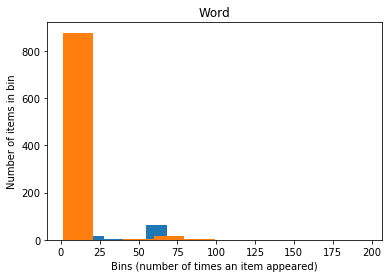

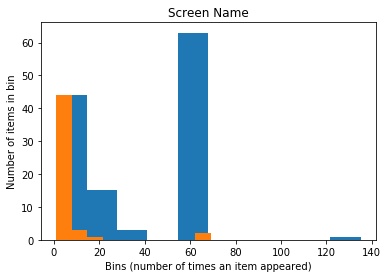

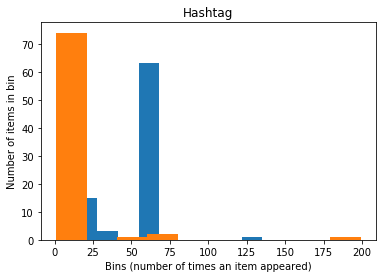

In [5]:
%matplotlib inline

from collections import Counter
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import json
#Establishing Connection
import twitter
CONSUMER_KEY = '6x2ak5AGgHr3dnC0j2V4734NA'
CONSUMER_SECRET = 'ufHhOTbVGUz4fGpXUGlHpdOwYWmb6JkMw7Y17jrvzOmlyZPkoZ'
OAUTH_TOKEN = '44870735-3Jg9QU4PQjmGGatjhHzuIhQSxSiSZnZnasHwSdQ95'
OAUTH_TOKEN_SECRET = 'NHKcEmN5j0RoD0HPOGj2WGRpSDVcGNwwqRrXY6qM8yEvI'
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)
print(twitter_api)

#trending topics using World Id,woeid available on yahoo 
WORLD_WOE_ID = 1
CA_WOE_ID = 23424775

#getting world trends

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
ca_trends = twitter_api.trends.place(_id=CA_WOE_ID)

#output
# basic analysis
# using python sets to find common trending between world and india

world_trends_set = set([trend['name']
                      for trend in world_trends[0]['trends']
                       ])
ca_trends_set = set([trend['name']
                   for trend in ca_trends[0]['trends']
                    ])
common_trends = world_trends_set.intersection(ca_trends_set)
print common_trends

print json.dumps(world_trends, indent=1)
print 
print json.dumps(ca_trends, indent=1)

## Searching statuses 

q = '#Jio'
count = 100

search_results = twitter_api.search.tweets(q=q,count=count)
statuses = search_results['statuses']

for _ in range(5):
    print "Length of statuses", len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e: # nothin when next result null
        break
    #dictionary
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&")])
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']
   

    #extracting text, screen names, and hastags
    status_texts = [ status['text']
                 for status in statuses]
    screen_names = [user_mention['screen_name']
                for status in statuses
                    for user_mention in status['entities']['user_mentions']]

    hashtags = [ hashtag['text']
            for status in statuses
                for hashtag in status['entities']['hashtags']]

    # collection of words 
    words = [ w
          for t in status_texts
              for w in t.split()]

#frequency distribution from the words in tweets 
for item in [words,screen_names,hashtags]:
    c=Counter(item)
    print c.most_common()[:10] #top 10
    print

retweets  = [ 
            (status['retweet_count'],
             status['retweeted_status']['user']['screen_name'],
             status['text'])
            
            for status in statuses
                if status.has_key('retweeted_status')

            ]    
#pretty table to display tuples in a nice tabular format
#Data Visualization Frequency Data with Histograms
for label, data in(
                    ('Word', words),
                    ('Screen Name', screen_names),
                    ('Hashtag', hashtags)):
    counts = [count for count, _, _ in retweets]
    plt.hist(counts)
    plt.title("Retweets")
    plt.xlabel('Bins (number of times retweed)')
    plt.ylabel('Number of tweets in bin')
    
    print counts
    
    
    pt = PrettyTable(field_names=[label, 'Count'])
    c  = Counter(data)
    plt.hist(c.values())
    
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    plt.figure()
    
    [pt.add_row(kv) for kv in c.most_common()[:10]]
    pt.align[label], pt.align['Count'] = 'l', 'r' # column alignment
    print pt
    
    pt = PrettyTable(field_names=['Count','Screen Name', 'Text'])
    [ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5]]
    pt.max_width['Text'] = 50
    pt.align= 'l'
    print pt
    
    

# lexical diversity measure for tweets 

def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens)

def average_words(statuses):
    total_words = sum([len(s.split()) for s in statuses])
    return 1.0*total_words/len(statuses)

#users who have retweeted a status using statuses/retweets/:id API.
_retweets  = twitter_api.statuses.retweets(id=317127304981667841)
print [r['user']['screen_name'] for r in _retweets]
                     

                     





#printing lexical diversity Quantitative Measure

print lexical_diversity(words)
print lexical_diversity(screen_names)
print lexical_diversity(hashtags)
print average_words(status_texts)



#print sample search by slicing the list
print json.dumps(statuses[0], indent=1)    
        
#print first items
print json.dumps(status_texts[0:5], indent=1)
print json.dumps(screen_names[0:5], indent =1)
print json.dumps(hashtags[0:5], indent =1)
print json.dumps(words[0:5], indent =1)